### Homework 1 
### Sophie Wynn

**Problem 1**

In [16]:
#import packages
import numpy as np
import netCDF4 as nc
from datetime import datetime, timedelta

# use the function  below to get dates for 2021

def get_2021_pier_data(date_start=None, date_end=None):
    """
    Return temperature, pressure, and time data from the 2020 pier record.

    Parameters:
    date_start (datetime): Start date for data retrieval (default: None, uses minimum date in dataset).
    date_end (datetime): End date for data retrieval (default: None, uses maximum date in dataset).

    Returns:
    dict: Dictionary containing time, temperature, pressure, and readme information.
    """

    file_path = file = 'http://sccoos.org/thredds/dodsC/autoss/scripps_pier-2021.nc'

    with nc.Dataset(file_path, 'r') as dataset:
        time = dataset.variables['time'][:]
        temperature = dataset.variables['temperature'][:]
        pressure = dataset.variables['pressure'][:]

    date0 = datetime(1970, 1, 1)
    dnum = np.array(time) / 3600 / 24 + date0.toordinal()

    if date_start is None:
        date_start = min(dnum)   #refers to the number of input vairbles if date start and end is not included then take the entire dataset
    if date_end is None:
        date_end = max(dnum)

    i1 = np.where((dnum > date_start) & (dnum < date_end))[0]

    pier = {
        'dnum': dnum[i1],
        'temperature': temperature[i1],
        'pressure': pressure[i1],
        'readme': '2021 Pier data, SIO221a, function Get2021PierData.py'
    }

    return pier

# Specify the date ranges in datetime format
date_start = datetime(2021, 1, 1, 0, 0, 0)
date_end = datetime(2021, 12, 31, 0, 0, 0)

# Convert dates to like MATLAB's datenum
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()

# Call the function to get pier data for the given date range
pier_data2021 = get_2021_pier_data(date_start_ordinal, date_end_ordinal)


***Part A***

Text(0.5, 1.0, 'SIO Pier Sea Surface Temperature 2021')

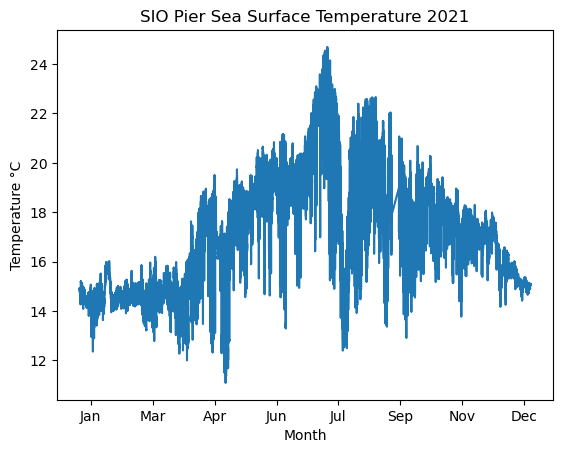

In [2]:
#import plotting and date packages
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

#read in the temperature data
temp2021 = pier_data2021['temperature']
#read in the time data
dnum2021 = pier_data2021['dnum']

#plot time with respect for temperature
plt.plot(dnum2021,temp2021 )
#label the months of the year
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
# add labels and a title to the graph
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.title("SIO Pier Sea Surface Temperature 2021")

**Observations:**
I see a seasonal trend where the temperature is generally warmer in the Summer (June, July August and into September), compared to Winter (December January February). Additonally there is a larger variance in temperature in the Summer compared to the Winter, for example just by looking at the graph I can estimate the temperature varies only by around 3-4 degrees Celcius in January and in June to July it the temperature varies my almost 10 degrees Celcius. 

***Part B***


In [3]:
print("Mean of 2021 Temperature", np.mean(temp2021), "°C")
print("Standard Deviation of 2021 Temperature", np.std(temp2021), "°C")


Mean of 2021 Temperature 17.279812 °C
Standard Deviation of 2021 Temperature 2.4262009 °C
We expect to see a temperature of 17.3°C for the water off of the SIO pier in 2021, that temperature is expected to deviated by 2.4 °C


**Observations:** We expect to see a temperature of 17.3°C for the sea surface temperature at the SOP pier in 2021, that temperature is expected to deviate by 2.4 °C"

***Part C***

In [4]:

# label the mean and standard deviation for the Gaussian distribution
mu = np.mean(temp2021)
sigma = np.std(temp2021)

# Generate data points for x for the Gaussian distribution
x = np.arange(10, 25, 0.1)

#create a gaussian distribution for the 2021 data by applying the standard formula 
gaussian = 1.0 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

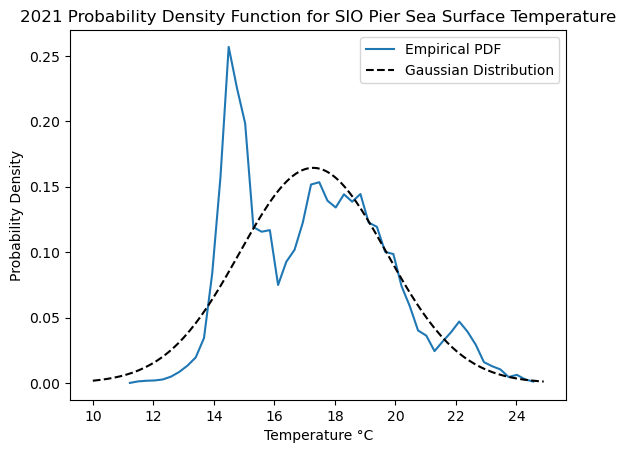

In [5]:
# use the np.histogram command to create the empirical PDF for the 2021 temperature data
hist, bins = np.histogram(temp2021, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

#create a plot to compare the Gaussian vs. the empirical
plt.plot(bin_centers, hist, label='Empirical PDF', linestyle='-')
plt.plot(x, gaussian, 'k--', label='Gaussian Distribution')
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('2021 Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

***Part C Observations:***
This look like a bimodal distribution, it has two peaks, one at around 15 °C and one at 18 °C. It does not represent a gaussian distribution very much, as seen above.  

**Problem 2**

In [17]:
# make a new function to give you multiple years of data 

def get_yearly_pier_data(year_start, year_end, date_start=None, date_end=None):
    """
    Return temperature, pressure, and time data for the specified year range.

    Parameters:
    year_start (int): Start year for data retrieval.
    year_end (int): End year for data retrieval.
    date_start (datetime): Start date for data retrieval (default: None, uses minimum date in dataset).
    date_end (datetime): End date for data retrieval (default: None, uses maximum date in dataset).

    Returns:
    dict: Dictionary containing time, temperature, pressure, and readme information.
    """

    # check for valid year range
    if year_end < year_start:
        raise ValueError("Invalid year range. 'year_end' should be greater than or equal to 'year_start'.")

    # name the file path and create space to input the wanted year ({})
    file_paths = ['http://sccoos.org/thredds/dodsC/autoss/scripps_pier-{}.nc'.format(year) for year in range(year_start, year_end + 1)]

    # create arrays to store the data
    all_time, all_temperature, all_pressure = [], [], []

    # loop through each file and get data
    for file_path in file_paths:
        with Dataset(file_path, 'r') as dataset:
            time = dataset.variables['time'][:]
            temperature = dataset.variables['temperature'][:]
            pressure = dataset.variables['pressure'][:]

        # change time data to datenum 
        date0 = datetime(1970, 1, 1)
        dnum = np.array(time) / 3600 / 24  + date0.toordinal()

        # now after specific year(s) choose the data based on date range
        if date_start is None:
            date_start = min(dnum)
        if date_end is None:
            date_end = max(dnum)

        i1 = np.where((dnum > date_start) & (dnum < date_end))[0]

        # store/formate data for this year
        all_time.append(dnum[i1])
        all_temperature.append(temperature[i1])
        all_pressure.append(pressure[i1])

    # Merge data from all years
    pier = {
        'dnum': np.concatenate(all_time),
        'temperature': np.concatenate(all_temperature),
        'pressure': np.concatenate(all_pressure),
        'readme': 'Pier data for years {} to {}, function get_yearly_pier_data'.format(year_start, year_end)
    }

    return pier


In [7]:
#select data from 2005 to 2021
date_start = datetime(2005, 1, 1, 0, 0, 0)
date_end = datetime(2021, 12, 31, 0, 0, 0)

# Convert dates to ordinal numbers (like MATLAB's datenum)
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()

#use function created above to get all the data
SIO = get_yearly_pier_data(2005, 2021, date_start_ordinal, date_end_ordinal)

***Part A***

Text(0.5, 1.0, 'Raw SIO Pier Sea Surface Temperature 2005 - 2021 ')

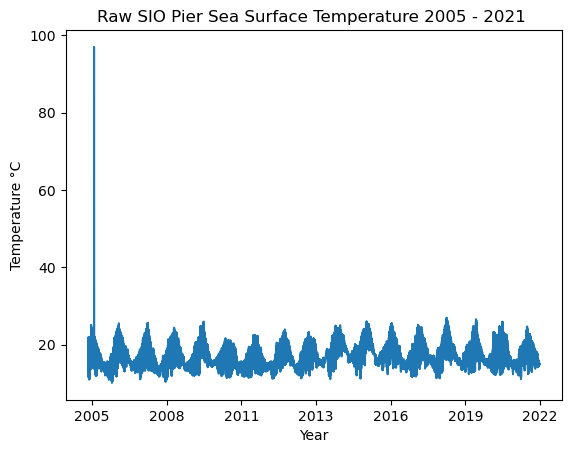

In [8]:
#Plot time vs. temperature for the 2005 to 2021 data

#redo datnum vector by subtracting by 1970 to get actual years, due to python preferences 
x = SIO['dnum']
y = SIO['temperature']
date0 = datetime(1970, 1, 1)
x1 = x - date0.toordinal()

#create and format plot
plt.plot(x1, y)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Raw SIO Pier Sea Surface Temperature 2005 - 2021 ")


In [9]:
print('max temp', np.max(SIO['temperature']))

max temp 97.0


**Observations**
You can see a seasonal cycle in the plot above, where the temperature reaches a maximum in the middle of the year, ie summer, this was also seen in the 2021 temperature plot. See the 97 degree reading in 2005 this must because of instrument faliure, because the warmest sea surface 
temperature reading from the SIO pier is reported to be 25.9°C (78.6°F) in 2018. (https://scripps.ucsd.edu/news/highest-ever-seawater-temperature-recorded-scripps-pier#:~:text=The%20record%20of%2025.9%C2%B0,been%20set%20at%20the%20pier.)
 

Text(0.5, 1.0, 'Filtered SIO Pier Sea Surface Temperature 2005 - 2021 ')

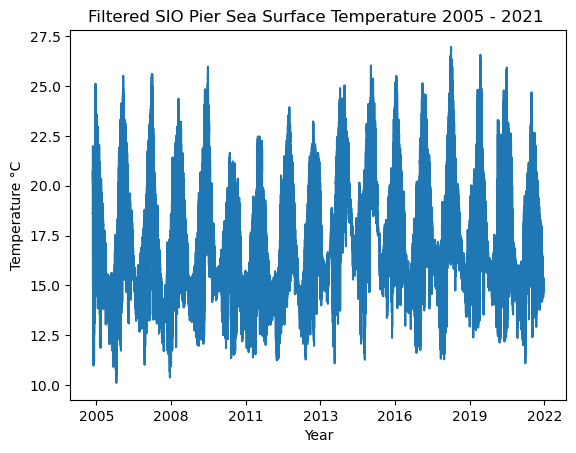

In [10]:
# Remove outlier/noise in the temperature dataset. 
temperature_threshold = 30 #hottest temperature allowed on the graph 
#(temperature of 30 degrees on the pier should never been seen, threshold is still very large)

#select dates and temperature below 30°C
filtered_temperature = SIO['temperature'][SIO['temperature'] <= temperature_threshold]
filtered_dnum = SIO['dnum'][SIO['temperature'] <= temperature_threshold]

#redo datnum by subtracting by 1970, due to python preferences 
filtered_dnum = filtered_dnum - date0.toordinal()

plt.plot(filtered_dnum, filtered_temperature)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Filtered SIO Pier Sea Surface Temperature 2005 - 2021 ")


**Observations** This graph displays the temperature variance better, compared to Raw SIO Pier Sea Surface Temperature 2005 - 2021. I can see now that 2011 to 2013 record lower summer temperatures than the rest of the years. 


***Part B***

In [11]:
print("Mean of 2005 to 2021 Temperature", np.mean(filtered_temperature), "°C")
print("Standard Deviation of 2005 to 2021 Temperature", np.std(filtered_temperature), "°C")

Mean of 2005 to 2021 Temperature 17.79963 °C
Standard Deviation of 2005 to 2021 Temperature 2.7388155 °C


**Observations** This long term record has very similar mean, and standard deviation compared to our results in problem 1. I would consider these results to be more accurate compared to 2021, due to the larger number of samples, when wanting a climatological mean. 

Text(0.5, 1.0, 'August 2016')

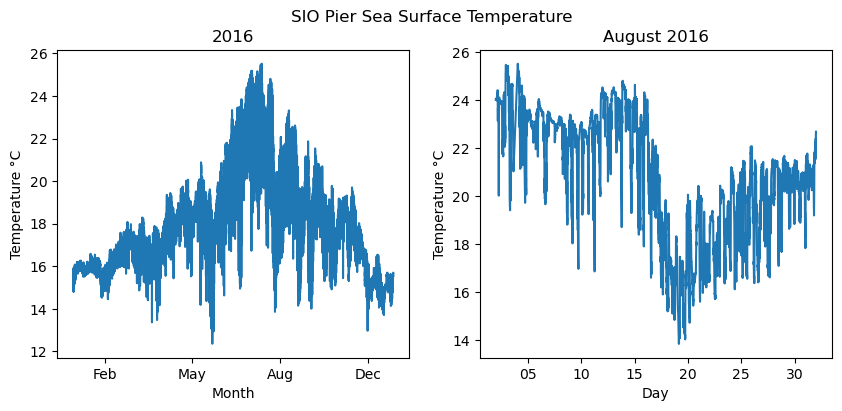

In [12]:
#compare the year 2016 and August 2016 to 2021

#look at 2016
date_start = datetime(2016, 1, 1, 0, 0, 0)
date_end = datetime(2016, 12, 31, 0, 0, 0)

#convert dates to  datenum
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()

#use the function to call the data
pier16 = get_yearly_pier_data(2016, 2016, date_start_ordinal, date_end_ordinal)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle("SIO Pier Sea Surface Temperature")
plt.plot(pier16['dnum'],pier16['temperature'])
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.title("2016")

#zoom into august 
Aug = np.where((pier16['dnum'] >= datetime(2016, 8, 1).toordinal()) &
                           (pier16['dnum'] <= datetime(2016, 8, 31).toordinal()))
plt.subplot(1, 2, 2)
plt.plot(pier16['dnum'][Aug], pier16['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2016")

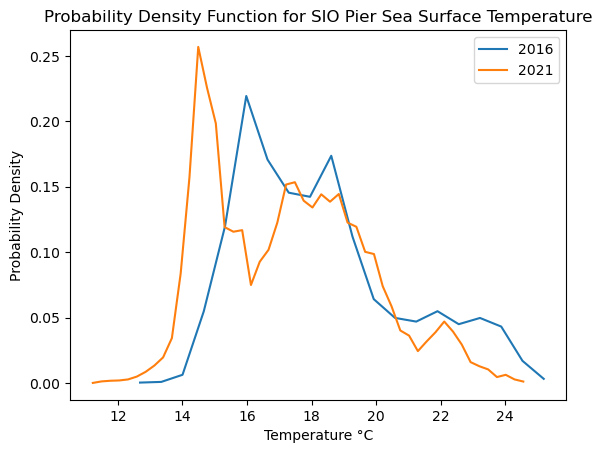

In [13]:
#create a PDF of 2016 and compare it to 2021
hist16, bins16 = np.histogram(pier16['temperature'], bins=20, density=True)
bin_centers16 = (bins16[:-1] + bins16[1:]) / 2
plt.plot(bin_centers16, hist16, label='2016', linestyle='-')
plt.plot(bin_centers, hist, label='2021', linestyle='-')
plt.legend()
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

**Observations** 
When comparing the temperature in 2016 to 2021 looking at the PDF, the temperatures in 2016, blue are warmer than in 2021, red. Both PDFs have a bimodal distrubtion, but 2021s in more distinct. In general we can say you are more likely to encounter warmer water in 2016 than 2021. 

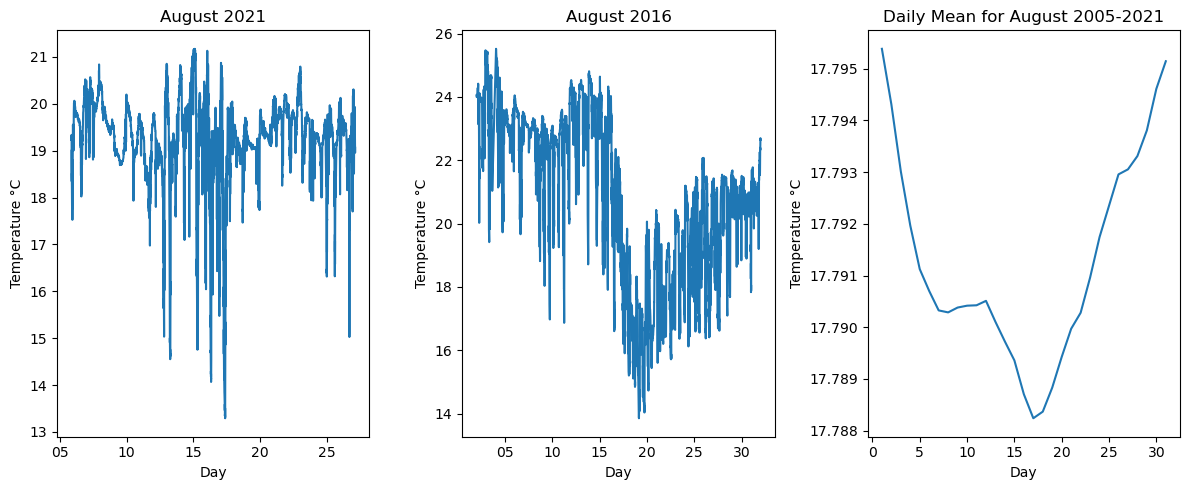

In [14]:
#compare the months of August in 2021, 2016, and over all 

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
#create a subplot and plot time, and temperaturature in august

#find august 2021 dates
Aug2021 = np.where((pier_data2021['dnum'] >= datetime(2016, 8, 1).toordinal()) &
                           (pier_data2021['dnum'] <= datetime(2016, 8, 31).toordinal()))

#plot for year 2021
plt.plot(pier_data2021['dnum'][Aug], pier_data2021['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2021")

#plot for year 2016
plt.subplot(1,3,2)
plt.plot(pier16['dnum'][Aug], pier16['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2016")

#Find average August temperature from 2005 to 2021 ie climatological mean for Aug. 

#assign the august daily mean temperature arrays 

daily_avg_temperature = np.zeros(31)

# go through each day in august 1 to 31
for day in range(1, 32):
    # find where it is august in the SIO dataset
    indices = np.where((SIO['dnum'] >= datetime(2005, 8, day).toordinal()) &
                       (SIO['dnum'] <= datetime(2021, 8, day).toordinal()))

    # calculate the mean temperature for that day
    daily_avg_temperature[day - 1] = np.mean(SIO['temperature'][indices])

# Plot the daily average temperature for August
plt.subplot(1,3,3)
days_of_august = np.arange(1, 32)
plt.plot(days_of_august, daily_avg_temperature)
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("Daily Mean for August 2005-2021")
plt.tight_layout()

**Observations** To understand if August 2021 or August 2016, unusual I decided to look at the daily average temperature for August from 2005-2021. When you look into the sea surface temperatures in August of 2016, we can see from the 15th to 20th day the water drastically decreases in temperature. 
And in 2021 the temperatures for August are much more consistent. You can also see the begining of August 2016 is much warmer than August 2021, so you could say the first half of August 2016 is unusualy warm, especially when comparing to the 2005 to 2021 mean. When comparing to the graph from 2005 to 2021 the shape of the temperature plot is similar to August, 2016, but when looking at the y axis you can see that the temperature does not change very much. So I am unclear to decide if August 2021 or August 2016 is unusual in terms of temperature and time trends. 

***Part C***

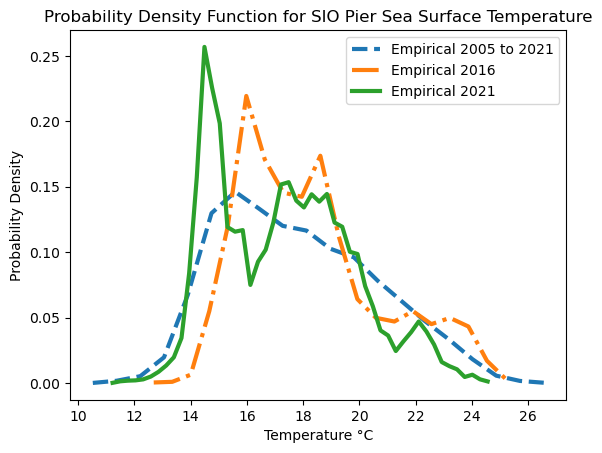

In [19]:
#PDF for whole year

#create a Empirical pdf for 2005 to 2021
hist0521, bins0521 = np.histogram(filtered_temperature, bins=20, density=True)
bin_centers0521 = (bins0521[:-1] + bins0521[1:]) / 2



#plot and compares the distributions
plt.plot(bin_centers0521, hist0521, label='Empirical 2005 to 2021', linestyle='--', linewidth=3)
plt.plot(bin_centers16, hist16, label='Empirical 2016', linestyle='-.', linewidth=3)
plt.plot(bin_centers, hist, label='Empirical 2021', linestyle='-', linewidth=3)


plt.legend()
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

**Observations:** 
Looking at the whole record from 2005 to 2021 the PDF widens more, and is more representivie across temperatutes due to the larger sample size. The PDF of 2005 to 2021 is also no longer bimodal, but does not represent the gaussian very well. The peak of the PDF, ie the most common temperature is about 15.5°C which is right in between the 2016 and 2021 peaks. Most of the temperature values for 2005 to 2021 fall between 14 and 21°C. Again 2016 has the warmest temperatures due to the PDF being shift to the right, toawrds the higher temperatures, while 2021 have the lowest temperatures. 